In [1]:
import numpy as np
import cPickle as pickle
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import time

start = time.time()

sv = CountVectorizer()
rv = CountVectorizer()
dv = TfidfVectorizer(max_df=1.0, min_df=0.01)

def load_data(pattern, train=False):
    docs = list()
    receivers = list()
    senders = list()
    for path in glob.glob("data/" + pattern):
        with open(path) as f:
            receivers.append(f.readline())
            senders.append(f.readline())
            docs.append(f.readline())

    if train:
        dv.fit(docs)
        sv.fit(senders)
        rv.fit(receivers)
        
    D = dv.transform(docs)
    S = sv.transform(senders)
    R = rv.transform(receivers)
    
    return D.toarray(), np.argmax(S.toarray(), axis=1), np.argmax(R.toarray(), axis=1)

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days


In [2]:
train_X, train_s, train_r = load_data("0*", True)
val_X, val_s, val_r = load_data("1*")

In [3]:
print train_X.shape

print val_s.shape
print 1-(val_s==0).mean()

print val_r.shape
print 1-(val_r==0).mean()

(13575, 2638)
(13589,)
0.932739715947
(13589,)
0.98807859298


In [9]:
val_s[val_s==0].shape

(914,)

In [29]:
val_s.max()

1801

In [38]:
val_s.min()

0

In [40]:
np.bincount(val_s)

array([914,   2,   2, ...,   0,   0,   2])

In [43]:
np.bincount(train_s)

array([5, 2, 2, ..., 1, 1, 1])

In [33]:
train_s.max()

1802

In [41]:
1-914.0/13589

0.9327397159467217

In [32]:
train_s[train_s==0].shape

(5,)

In [34]:
val_r.max()

528

In [35]:
train_r.max()

528

In [37]:
train_s

array([ 594,  596,  673, ..., 1538, 1317, 1375])

In [49]:
np.unique(train_s).shape

(1803,)

In [50]:
np.unique(val_s).shape

(1111,)

In [15]:
import pandas as pd
import pylab as plt
%matplotlib inline

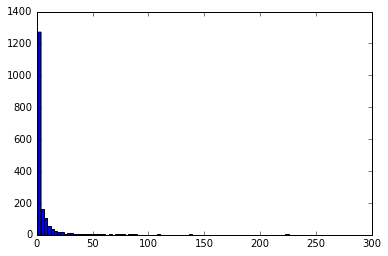

In [45]:
fig = plt.hist(np.bincount(train_s), 100)

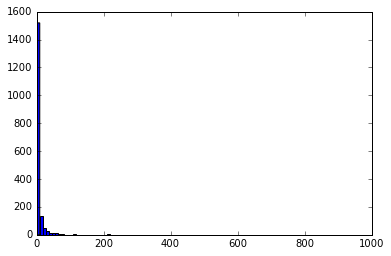

In [46]:
fig = plt.hist(np.bincount(val_s), 100)

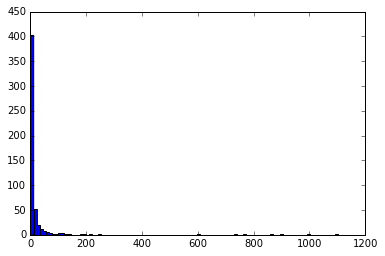

In [47]:
fig = plt.hist(np.bincount(train_r), 100)

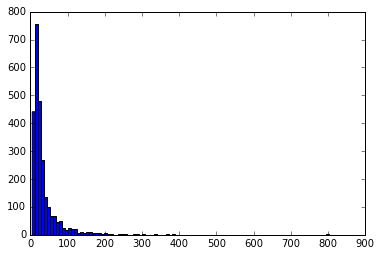

In [28]:
count_train_X = train_X.sum(axis = 0)
fig = plt.hist(count_train_X, 100)

In [25]:
count_train_X.shape

(2638,)

In [27]:
count_train_X[0:20]

array([  18.6880429 ,   27.62180834,   48.43947461,   27.8571333 ,
         45.28818747,    9.81272996,   19.29985323,   37.54856312,
         12.42679276,   13.32603169,   32.14740693,   27.95809546,
        154.26205379,   47.20367256,   19.56401162,   27.29705535,
        102.55001268,   23.4615696 ,  182.77165619,   18.02189779])

In [19]:
count_train_X.max()

804.06526962819919

In [20]:
count_train_X.max()/13575

0.059231327412758689

In [23]:
train_X[0,:].max()

0.34715671995863989

In [24]:
train_X.max()

0.99918727362947113

In [55]:
clf_s = MultinomialNB(alpha=0.0001, fit_prior=False)
clf_s.fit(train_X, train_s)
pred_s = clf_s.predict(val_X)
print f1_score(val_s, pred_s, average='micro')
print f1_score(val_s, pred_s, average='macro')
print f1_score(val_s, pred_s, average='weighted')
print accuracy_score(val_s, pred_s)
print precision_score(val_s, pred_s, average='weighted')

0.899624696446
0.772191692349
0.894157648378
0.899624696446
0.963246446677


In [1]:
clf_r = MultinomialNB(alpha=0.001, fit_prior=False)
clf_r.fit(train_X, train_r)
pred_r = clf_r.predict(val_X)
print f1_score(val_r, pred_r, average='micro')
print f1_score(val_r, pred_r, average='macro')
print f1_score(val_r, pred_r, average='weighted')

NameError: name 'MultinomialNB' is not defined

In [12]:
print "Took %f s" % (time.time()-start)

Took 524.371365 s


In [13]:
norm_coef = clf_s.coef_/np.abs(clf_s.coef_.sum(axis=1))[:,None]
clf_s2 = clf_s
clf_s2.feature_log_prob_ = norm_coef
pred_s = clf_s2.predict(val_X)
print f1_score(val_s, pred_s, average='micro')
print f1_score(val_s, pred_s, average='macro')
print f1_score(val_s, pred_s, average='weighted')

0.894988593716
0.805184970071
0.869086541886


In [14]:
norm_coef = clf_r.coef_/np.abs(clf_r.coef_.sum(axis=1))[:,None]
clf_r2 = clf_r
clf_r2.feature_log_prob_ = norm_coef
pred_r = clf_r2.predict(val_X)
print f1_score(val_r, pred_r, average='micro')
print f1_score(val_r, pred_r, average='macro')
print f1_score(val_r, pred_r, average='weighted')

0.741114136434
0.32337118875
0.745093810413


In [51]:
from sklearn.metrics import accuracy_score, precision_score